<a href="https://colab.research.google.com/github/Mv0sKff/MyDeepLearning/blob/main/week_2/Aufgabe_2_Multi_Class_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aufgabe 2: Multi-Class Perceptrons

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generation
from sklearn.preprocessing import OneHotEncoder

In [3]:
#create data
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(-1,10),random_state=42)

In [4]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

In [5]:
y=(y*2-1) #scale true lables from [0,1] to [-1,1
print(y)

[-1  1  3  1  3  3  1 -1  3  3 -1  3 -1  1  1 -1 -1  1  1 -1  3  1  3  1
  1  1 -1  1  3  1  3 -1 -1  1  3  3  3 -1  3 -1 -1  3 -1  3  1 -1 -1  1
 -1  1]


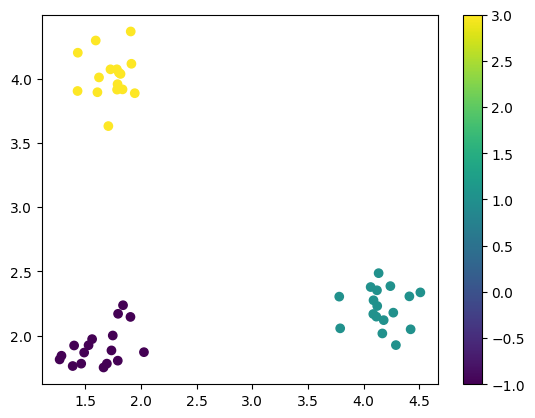

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

My Perceptron 2.svg

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [7]:
enc = OneHotEncoder(sparse_output=False)
encoded = enc.fit_transform(y.reshape(-1,1))
#y.reshape(-1,1)
#print(encoded)

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

#### test single perceptrons by class


In [8]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.

    line, = ax.plot(x, y, **kwargs)

    return line

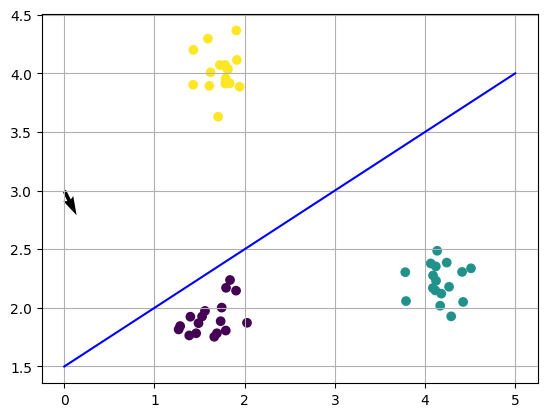

In [12]:
w1 = np.array([1,-2])
b1 = 3

line1 = plot_line_from_normal_vector_and_offset(w1, b1, color='blue', x_range=[0,5])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b1,w1[0],w1[1])
plt.grid()

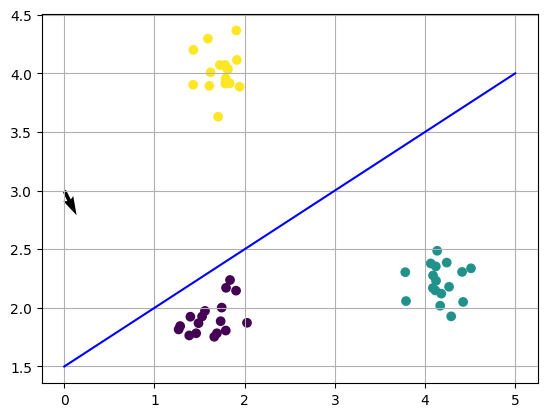

In [15]:
w2 = np.array([1, -2])
b2 = 3

line2 = plot_line_from_normal_vector_and_offset(w2, b2, color='blue', x_range=[0,5])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b2,w2[0],w2[1])
plt.grid()

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [11]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""

    return